Dataset size: (506, 14)


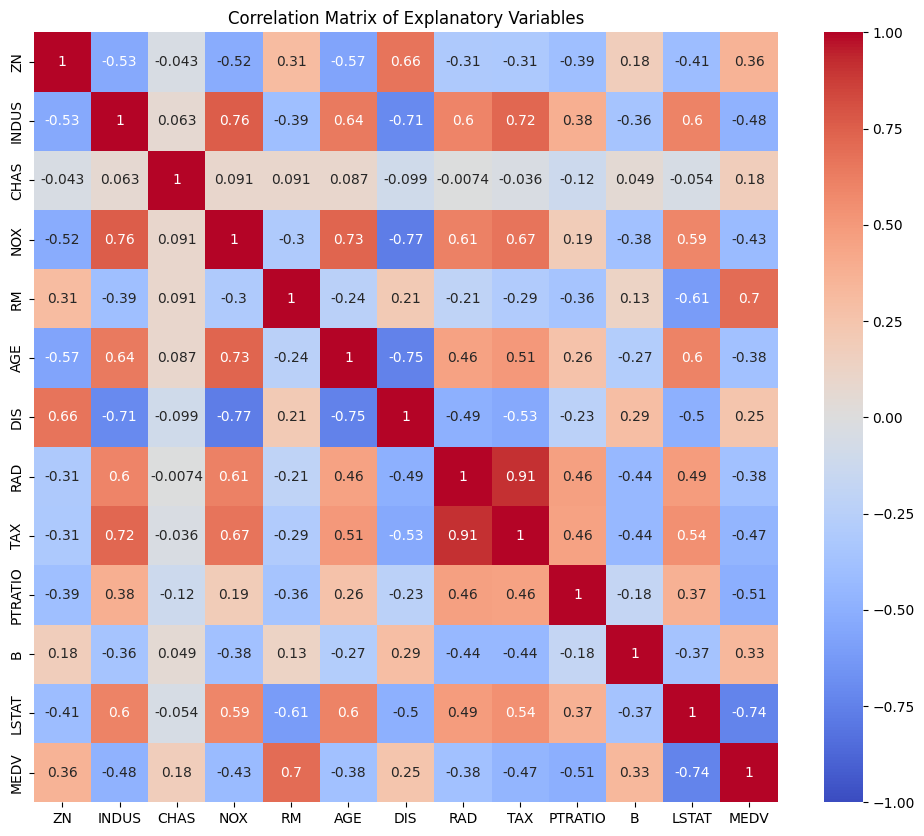

Best parameters: {'alpha': 35.564803062231285}
MSE: 43.6418742179085
R2 Score: 0.4089699127163402
MAE: 2.7868470446773697
MAPE: 11.657094848202618
RMSE: 6.606199680444764
Errors: count    5.060000e+02
mean    -1.291896e-15
std      6.393157e+00
min     -9.941393e+00
25%     -1.932887e+00
50%     -3.314897e-01
75%      8.758760e-01
max      7.627835e+01
Name: CRIM, dtype: float64


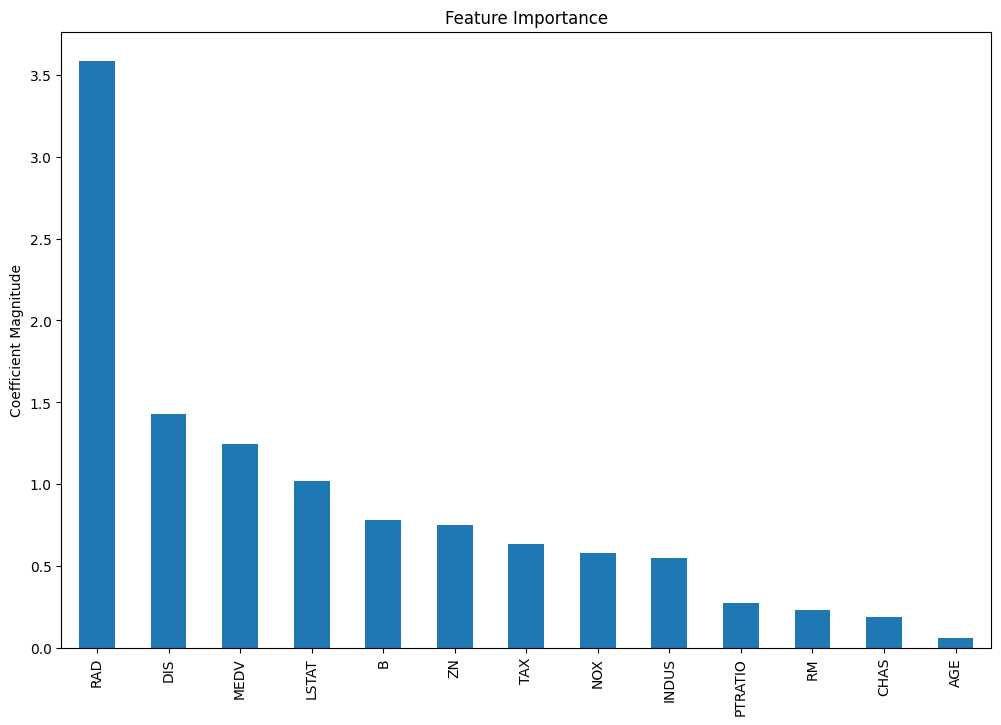

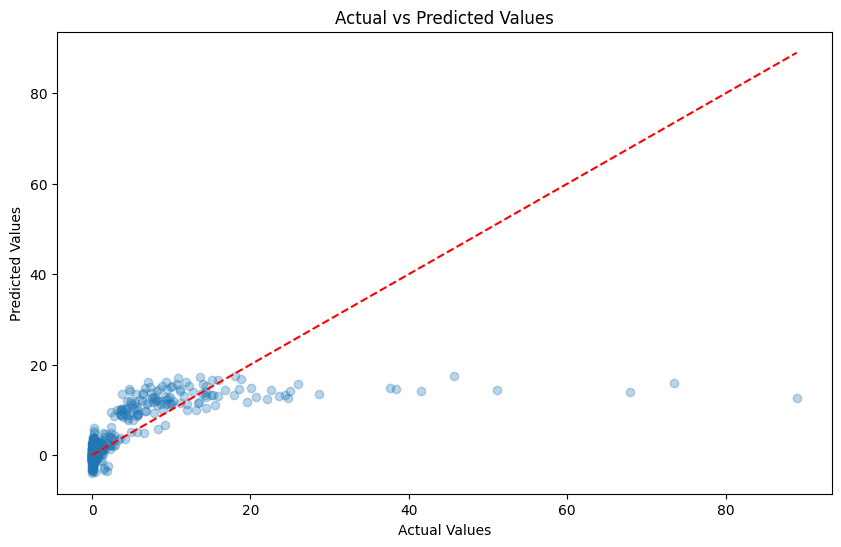

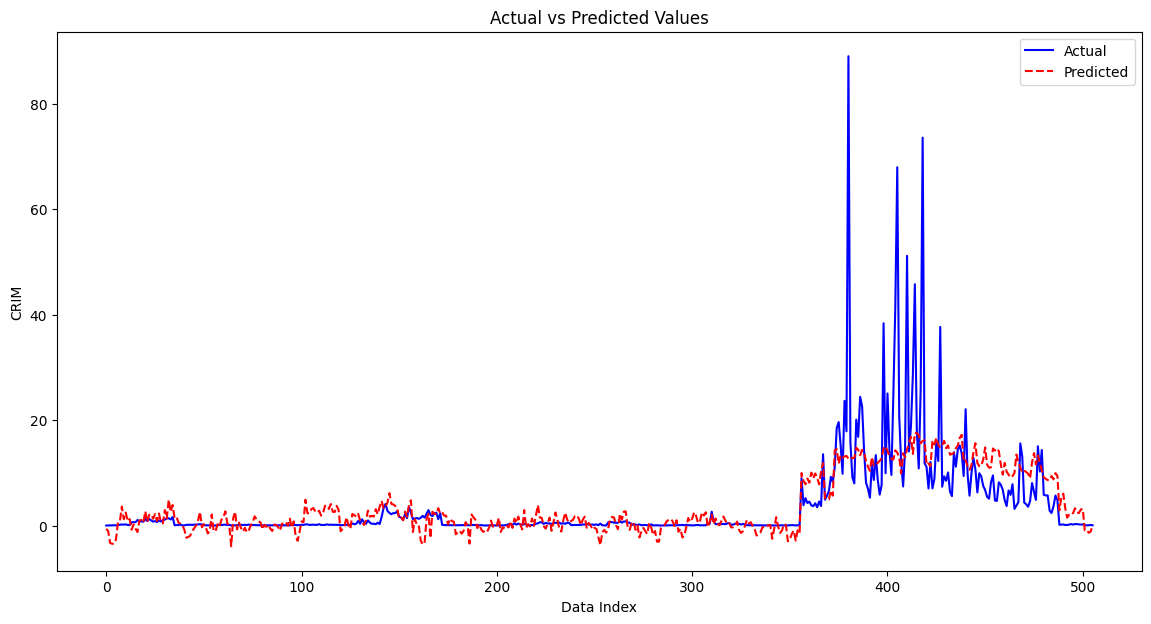

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# CSVファイルの読み込み
file_path = 'C:/Users/thisi/OneDrive/デスクトップ/Dateset1.csv'  # ファイルパスを適宜変更してください
data = pd.read_csv(file_path)

# データセットの大きさを確認
print(f'Dataset size: {data.shape}')

# 目的変数の指定
target_variable = 'CRIM'  # 目的変数名を適宜変更してください
X = data.drop(columns=[target_variable])
y = data[target_variable]

# 説明変数間の相関関係を示す画像を出力
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Explanatory Variables')
plt.show()

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ハイパーパラメータのグリッドサーチ
param_grid = {'alpha': np.logspace(-4, 4, 50)}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# k分割交差検定
kf = KFold(n_splits=10, shuffle=True, random_state=1)
y_pred = cross_val_predict(Ridge(**best_params), X_scaled, y, cv=kf)

# 評価指標の計算
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')

# 全データセットに対して予測を行い、実測値と予測値の誤差を出力
ridge_best = Ridge(**best_params)
ridge_best.fit(X_scaled, y)
y_all_pred = ridge_best.predict(X_scaled)

errors = y - y_all_pred
print(f'Errors: {errors.describe()}')

# 予測結果をCSVファイルに出力
predictions = pd.DataFrame({'Actual': y, 'Predicted': y_all_pred, 'Error': errors})
predictions.to_csv('Ridge_predictions.csv', index=False)

# 特徴量の重要度を示す画像を出力
importance = np.abs(ridge_best.coef_)
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Coefficient Magnitude')
plt.show()

# 実測値と予測値のプロット
plt.figure(figsize=(10, 6))
plt.scatter(y, y_all_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # y=xの線
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 実測値と予測値の時系列プロット
plt.figure(figsize=(14, 7))
plt.plot(y.values, label='Actual', color='b')
plt.plot(y_all_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Data Index')
plt.ylabel(target_variable)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
